# Домашнее задание (28 баллов)

## 1. Теория (6 баллов)

 Сеть $G(t)$ образуется присоединением к центральному узлу $t$ треугольников - см. рисунок. ![picture](https://drive.google.com/uc?export=view&id=10oUgXsay2rBYHGIbKoHJVvj95Rl632qz)
 
 Пусть всего в сети $n$ вершин, $n=2t+1$. 

*  (2 балла) Определите средний коэффициент кластеризации вершин в сети $\overline{C}$  как функцию $n$. Чему равен предел при $n \to \infty$? 
* (2 балла) Определите транзитивность  $T$ в зависимости от числа вершин $n$. Чему равен предел при $n \to \infty$? 
* (2 балла) Определите коэффициент ассортативности  $r$ в зависимости от числа вершин $n$. Чему равен предел при $n \to \infty$? 

## 2. Анализ данных (22 балла)
Выберите данные [здесь](https://networkrepository.com/networks.php) или [здесь](https://snap.stanford.edu/data/). 
Выведите число вершин, число ребер и плотность сети. 




In [ ]:
!pip install powerlaw
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import powerlaw
from scipy.stats import pearsonr
from collections import defaultdict
from tabulate import tabulate
from google.colab import drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/"My Drive"/"анализ"
!gzip -d p2p-Gnutella30.txt.gz

Mounted at /content/gdrive
/content/gdrive/My Drive/анализ


In [ ]:
G = nx.read_edgelist("p2p-Gnutella30.txt", delimiter='	')
print('Вершины:',G.number_of_nodes())
print('Ребра:',G.number_of_edges())
print('Плотность:',nx.density(G))

Вершины: 36682
Ребра: 88328
Плотность: 0.0001312907771568989


### Основные структурные свойства ( 5 баллов) 

*  (2 балла)  Постройте распределение коэффициента кластеризации, какие значения он преимущественно принимает? Сколько вершин имеют нулевую кластеризацию, сколько единичную?

*  (1 балл) Вычислите коэффициент корреляции Пирсона степени и коэффициента кластеризации вершин;

*  (2 балла) Определите число компонет связности и постройте распределение размера компонент связности (удалите из массива максимальную компоненту для наглядности;



*  (2 балла)  Постройте распределение коэффициента кластеризации, какие значения он преимущественно принимает? Сколько вершин имеют нулевую кластеризацию, сколько единичную?

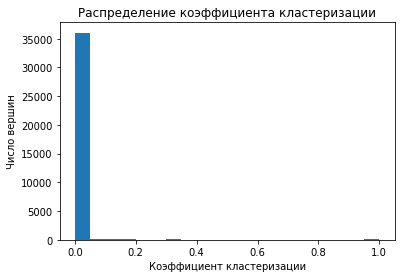

Коэффициент кластеризации преимущественно принимает значения [0; 0.05)
Средняя кластеризация: 0.006293059955713536
Вершин с коэффицентом кластеризации 0: 33609
C коэффицентом кластеризации 1: 98


In [ ]:
clustering_coefs = np.fromiter(nx.clustering(G).values(), dtype=float)
plt.hist(clustering_coefs, bins=20)
plt.title('Распределение коэффициента кластеризации')
plt.xlabel('Коэффициент кластеризации')
plt.ylabel('Число вершин')
plt.show()

print('Коэффициент кластеризации преимущественно принимает значения [0; 0.05)')
print('Средняя кластеризация:', nx.average_clustering(G))
print(f'Вершин с коэффицентом кластеризации 0: {sum(clustering_coefs == 0)}\nC коэффицентом кластеризации 1: {sum(clustering_coefs == 1)}')

*  (1 балл) Вычислите коэффициент корреляции Пирсона степени и коэффициента кластеризации вершин;

In [ ]:
degrees = np.fromiter(dict(G.degree()).values(), dtype=float)
pearson_coef, _ = pearsonr(degrees, clustering_coefs)
print('Коэффициент корреляции Пирсона степени и коэффициента кластеризации вершин:', pearson_coef)

Коэффициент корреляции Пирсона степени и коэффициента кластеризации вершин: 0.004237703540876449


*  (2 балла) Определите число компонет связности и постройте распределение размера компонент связности (удалите из массива максимальную компоненту для наглядности;

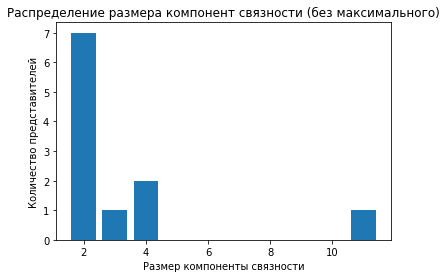

Всего компонент связности: 12


In [ ]:
connected_components = sorted(map(len, nx.connected_components(G)))[:-1]
labels, counts = np.unique(connected_components, return_counts=True)
plt.bar(labels, counts)
plt.title('Распределение размера компонент связности (без максимального)')
plt.xlabel('Размер компоненты связности')
plt.ylabel('Количество представителей')
plt.show()

print('Всего компонент связности:', nx.number_connected_components(G))


### Распределение степеней и корреляция ( 10 баллов)

*  (3 балла) Для выбранной сети постройте распределение степеней, определите, подчиняется ли распределение степенному закону, оцените параметры распределения.

*  (1 балл) Определите коэффициент ассортативности сети. 

*  (2 балла) Постройте функцию корреляции степеней. Для этого для каждого значения степени $k$ определите  среднее значение средней степени ближайших соседей вершин :). 

* (2 балл) Постройте зависимость коэффициента Rich Club от k.

* (2 балла) Напишите функцию разложения сети по k-core, постройте соответвующее разложение. 

*  (3 балла) Для выбранной сети постройте распределение степеней, определите, подчиняется ли распределение степенному закону, оцените параметры распределения.


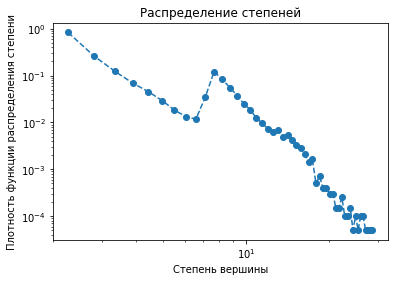

In [ ]:
h, x = np.histogram(degrees, bins=100, density=True)
half_step = (x[0] + x[1])/2
h = h[np.nonzero(h)]
x = x[np.nonzero(h)] + half_step

plt.plot(x, h, 'o--')
plt.title('Распределение степеней')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Степень вершины')
plt.ylabel('Плотность функции распределения степени')
plt.show()

Calculating best minimal value for power law fit


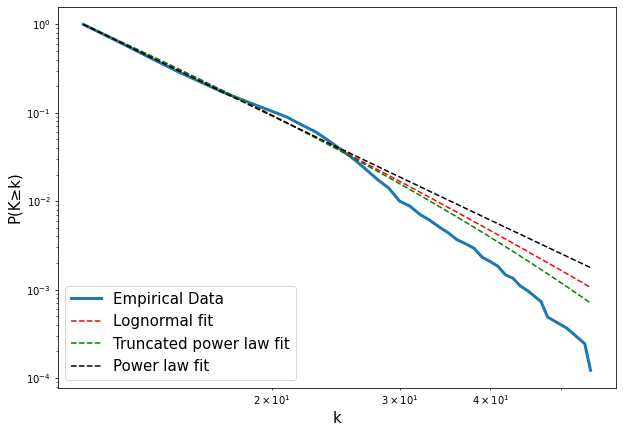

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

fit = powerlaw.Fit(degrees, discrete=True)
fit.plot_ccdf(ax=ax, linewidth=3, label='Empirical Data')
fit.lognormal.plot_ccdf(ax=ax, color='r', linestyle='--', label='Lognormal fit')
fit.truncated_power_law.plot_ccdf(ax=ax, color='g', linestyle='--', label='Truncated power law fit')
fit.power_law.plot_ccdf(ax=ax, color='k', linestyle='--', label='Power law fit')

ax.set_xlabel('k', fontsize=15)
ax.set_ylabel('P(K≥k)', fontsize=15)
ax.legend(loc=3, fontsize=15)
fig.show()

In [ ]:
fit.distribution_compare('power_law', 'lognormal')

(-6.038770864604588, 0.01228133511938327)

In [ ]:
fit.distribution_compare('lognormal', 'truncated_power_law')

(-3.9002443018020783, 4.4960163789533395e-08)

*  (1 балл) Определите коэффициент ассортативности сети. 

In [ ]:
print('Коэффициент ассортативности сети:', nx.degree_assortativity_coefficient(G))

Коэффициент ассортативности сети: -0.10337489181103965


*  (2 балла) Постройте функцию корреляции степеней. Для этого для каждого значения степени $k$ определите  среднее значение средней степени ближайших соседей вершин :).

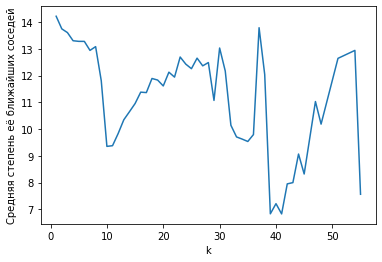

In [ ]:
average_neighbor_degree = nx.average_neighbor_degree(G)
degree_grouped = defaultdict(list)
for node, degree in G.degree():
  degree_grouped[degree].append(average_neighbor_degree[node])

res = {}
for degree in degree_grouped:
  res[degree] = np.average(degree_grouped[degree])

x = sorted(res.keys())
y = [res[deg] for deg in x]

plt.plot(x, y)
plt.xlabel('k')
plt.ylabel('Средняя степень её ближайших соседей')
plt.show()

* (2 балл) Постройте зависимость коэффициента Rich Club от k.

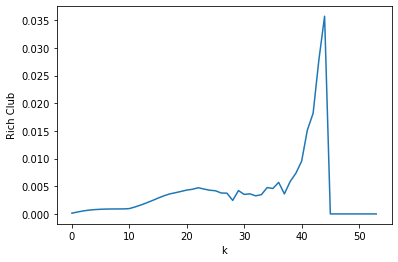

In [ ]:
rich_club_coefficient = nx.rich_club_coefficient(G, normalized=False, seed=4)
plt.plot(list(rich_club_coefficient.values()))
plt.xlabel('k')
plt.ylabel('Rich Club')
plt.show()


* (2 балла) Напишите функцию разложения сети по k-core, постройте соответвующее разложение. 

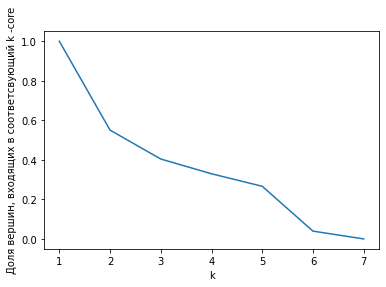

In [ ]:
y = []
i = 1

kG = nx.k_core(G, k=i)
while len(kG) > 0:
  y.append(len(kG) / len(G))
  i += 1
  kG = nx.k_core(G, k=i)

plt.plot(range(1, i), y)
plt.xlabel('k')
plt.ylabel('Доля вершин, входящих в соответсвующий k -core')
plt.show()

### Моделирование и рандомизация (7 баллов)


* (2 балла) Для произвольной (неслучайной) сети подберите параметры моделей Эрдеша-Реньи, Барабаши-Альберта. Постройте соответсвующие случайные сети и определите какая из моделей лучше описывает кластеризацию сети. 

* ( 2 балла) Постройте конфигурационную модель для выбранной сети, лучше ли эта модель справляется с описанием кластеризации? Определите сколько в смоделированной сети петель, мультиребер. 

* (2 балла) Напишите функцию, осуществляющую заданное число шагов $Q$ рандомизации. 
Лучше задавать множителем $f$ от числа ребер в системе, т.е. $f=\frac{Q}{L}$, $L$-число ребер;

* (1 балла) Постройте зависимость средней кластеризации (транзитивности) от числа рандомизиции $f$.  

* (2 балла) Для произвольной (неслучайной) сети подберите параметры моделей Эрдеша-Реньи, Барабаши-Альберта. Постройте соответсвующие случайные сети и определите какая из моделей лучше описывает кластеризацию сети. 



In [ ]:
number_of_nodes=G.number_of_nodes()
number_of_edges=G.number_of_edges()

In [ ]:
def compare(headers, *graphs):
  def transitivity(g):
    try:
      return nx.transitivity(g)
    except nx.NetworkXNotImplemented:
      return ''

  data = [['Вершины'] + [g.number_of_nodes() for g in graphs],
          ['Рёбра'] + [g.number_of_edges() for g in graphs],
          ['Плотность'] + [f'{nx.density(g):.4f}' for g in graphs],
          ['Средняя степень'] + [f'{np.mean(np.fromiter(dict(g.degree()).values(), dtype=float)):.4f}' for g in graphs],
          ['Транзитивность'] + [transitivity(g) for g in graphs],
          ['Число компонент связности'] + [len(tuple(nx.connected_components(g))) for g in graphs],
          ['Глобальная эффективность'] + [f'{nx.global_efficiency(g):.4f}' for g in graphs],
          ['Средняя локальная эффективность'] + [f'{nx.local_efficiency(g):.4f}' for g in graphs]]
  
  print(tabulate(data, headers=headers, tablefmt='grid', stralign='center', numalign='center'))

* ( 2 балла) Постройте конфигурационную модель для выбранной сети, лучше ли эта модель справляется с описанием кластеризации? Определите сколько в смоделированной сети петель, мультиребер. 



* (2 балла) Напишите функцию, осуществляющую заданное число шагов $Q$ рандомизации. 
Лучше задавать множителем $f$ от числа ребер в системе, т.е. $f=\frac{Q}{L}$, $L$-число ребер;



* (1 балла) Постройте зависимость средней кластеризации (транзитивности) от числа рандомизиции $f$.  